In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-15 to 2019-07-12 - 77


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

75


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EWZ,36,0.582623,0.512981,1.120289,22.059923,3.772108
ILF,36,0.374368,0.346325,1.058059,13.221454,3.070039
RSX,36,0.332470,0.251394,1.290935,12.990080,1.428578
FNDE,36,0.227553,0.279430,0.785944,8.185064,1.628895
DGS,36,0.202363,0.306225,0.634913,6.425804,3.353929
PXH,36,0.191233,0.281736,0.650594,6.748082,1.961680
DEM,36,0.180292,0.283948,0.606997,6.239693,1.795207
GEM,36,0.172761,0.309381,0.532757,5.665582,2.518333
VWO,36,0.170062,0.316761,0.511823,5.090524,2.832727


evicted EWA 0.872 -0.098
evicted EEMV 0.884 0.092
evicted EWT 0.889 -0.264
evicted AIA 0.868 -0.128
evicted ACWI 0.894 -0.385
evicted EWY 0.672 -0.037
evicted EWL 0.786 -0.080
evicted HEDJ 0.886 -0.341
evicted ASHR 0.825 -0.047
evicted EWH 0.894 -0.164
evicted EPP 0.639 -0.168
evicted DGS 0.431 -0.055
evicted EPI 0.098 -0.194
retry backlogs ['IDEV', 'SCZ', 'PXH', 'VPL', 'EWJ', 'VEU', 'DLS', 'GSIE', 'SPDW', 'EEM', 'FNDF', 'EFA', 'VXUS', 'IEUR', 'SCHE', 'IDV', 'VT', 'SCHC', 'VEA', 'IEMG', 'IPAC', 'PXF', 'EFV', 'IEFA', 'FDT', 'VSS', 'VGK', 'IXUS', 'ACWX', 'IEV', 'SCHF', 'EWU', 'CWI', 'DBEF', 'TLTD', 'JPIN', 'EFAV', 'VWO', 'SPEM', 'EZU', 'VIGI', 'EFG', 'VYMI', 'GXC', 'MCHI', 'GEM', 'INTF', 'FEZ', 'RODM', 'AAXJ', 'EWG', 'FNDC', 'DEM', 'FNDE', 'ILF', 'FXI', 'HEFA', 'INDA', 'EWC'] at 0.905/-0.51 - 1.657
evicted EWC 0.828 -0.381
evicted FDT 0.775 -0.354
evicted SPEM 0.568 0.039
evicted INDA 0.078 -0.129
retry backlogs ['IDEV', 'TLTD', 'INTF', 'EWU', 'VGK', 'JPIN', 'IEV', 'GXC', 'EFG', 'SCHF', 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,0.376474,0.224023,-0.078036,0.230034,0.348724,0.537835,0.835753,1.645089,14.259629,1.514117
RSX,36.0,0.332470,0.251394,-0.050221,0.146660,0.326998,0.487748,0.834201,1.290935,12.990080,1.428578
EWZ,36.0,0.582623,0.512981,-0.296545,0.150114,0.492526,1.030733,1.449663,1.120289,22.059923,3.772108
DXJ,36.0,0.079166,0.362241,-0.519134,-0.162403,-0.034511,0.244372,0.806756,0.196635,2.387542,4.053224


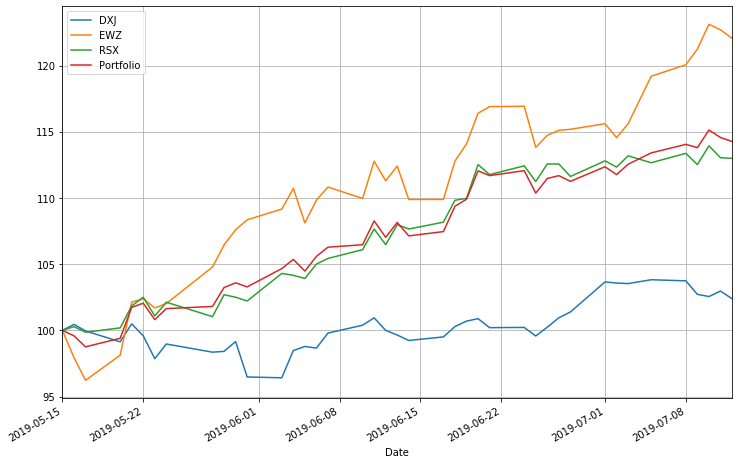

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)